<a href="https://colab.research.google.com/github/dantrainor9/Mental-Health-Diagnostics/blob/main/Mental_Health_Diagnostics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "/content/drive/MyDrive/Mental Health Diagnostics/Dataset-Mental-Disorders.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2 From 10,5 From 10,3 From 10,Depression
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7 From 10,7 From 10,7 From 10,Depression


In [5]:
df.describe(include='all')

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
count,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
unique,120,4,4,4,4,2,3,2,2,2,2,2,2,2,2,9,8,9,4
top,Patiant-01,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-2
freq,1,42,46,38,44,63,63,74,73,63,62,70,62,61,65,22,33,21,31


In [6]:
#dropping patient number, redundant for ML and EDA
df.drop(columns='Patient Number', inplace=True)

In [7]:
df

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2 From 10,5 From 10,3 From 10,Depression
116,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1
117,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2
118,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7 From 10,7 From 10,7 From 10,Depression


In [8]:
df.shape

(120, 18)

In [9]:
#checking value counts of feature and target columns
df['Sadness'].value_counts()

Sadness
Usually       42
Sometimes     42
Most-Often    20
Seldom        16
Name: count, dtype: int64

In [10]:
df['Euphoric'].value_counts()

Euphoric
Seldom        46
Sometimes     45
Usually       20
Most-Often     9
Name: count, dtype: int64

In [11]:
df['Exhausted'].value_counts()

Exhausted
Sometimes     38
Usually       34
Most-Often    30
Seldom        18
Name: count, dtype: int64

In [12]:
df['Sleep dissorder'].value_counts()

Sleep dissorder
Sometimes     44
Usually       34
Most-Often    21
Seldom        21
Name: count, dtype: int64

In [13]:
df['Mood Swing'].value_counts()

Mood Swing
NO     63
YES    57
Name: count, dtype: int64

In [14]:
df['Suicidal thoughts'].value_counts()

Suicidal thoughts
NO      63
YES     56
YES      1
Name: count, dtype: int64

In [15]:
df['Anorxia'].value_counts()

Anorxia
NO     74
YES    46
Name: count, dtype: int64

In [16]:
df['Authority Respect'].value_counts()

Authority Respect
NO     73
YES    47
Name: count, dtype: int64

In [17]:
df['Try-Explanation'].value_counts()

Try-Explanation
NO     63
YES    57
Name: count, dtype: int64

In [18]:
df['Aggressive Response'].value_counts()

Aggressive Response
NO     62
YES    58
Name: count, dtype: int64

In [19]:
df['Ignore & Move-On'].value_counts()

Ignore & Move-On
NO     70
YES    50
Name: count, dtype: int64

In [20]:
df['Nervous Break-down'].value_counts()

Nervous Break-down
YES    62
NO     58
Name: count, dtype: int64

In [21]:
df['Admit Mistakes'].value_counts()

Admit Mistakes
NO     61
YES    59
Name: count, dtype: int64

In [22]:
df['Overthinking'].value_counts()

Overthinking
YES    65
NO     55
Name: count, dtype: int64

In [23]:
df['Sexual Activity'].value_counts()

Sexual Activity
5 From 10    22
4 From 10    20
3 From 10    17
6 From 10    15
2 From 10    15
7 From 10    14
8 From 10    11
1 From 10     4
9 From 10     2
Name: count, dtype: int64

In [24]:
df['Concentration'].value_counts()

Concentration
4 From 10    33
2 From 10    21
5 From 10    21
7 From 10    14
3 From 10    12
6 From 10    10
1 From 10     5
8 From 10     4
Name: count, dtype: int64

In [25]:
df['Optimisim'].value_counts()

Optimisim
6 From 10    21
5 From 10    20
4 From 10    19
2 From 10    18
3 From 10    18
7 From 10     8
8 From 10     8
1 From 10     6
9 From 10     2
Name: count, dtype: int64

In [26]:
df['Expert Diagnose'].value_counts()

Expert Diagnose
Bipolar Type-2    31
Depression        31
Normal            30
Bipolar Type-1    28
Name: count, dtype: int64

In [27]:
#fairly even split of target column

In [28]:
#cleaning up data and encoding values for ML
df.rename(columns={'Anorxia':'Anorexia',
                   'Optimisim':'Optimism',
                   'Sleep Dissorder':'Sleep Disorder'},inplace=True)

In [29]:
df.replace({'Seldom':1,
            'Sometimes':2,
            'Usually':3,
            'Most-Often':4,
            'NO':0,
            'YES':1,
            'YES ':1},
            inplace=True)

In [30]:
df['Sexual Activity'] = df['Sexual Activity'].str[0]
df['Concentration'] = df['Concentration'].str[0]
df['Optimism'] = df['Optimism'].str[0]

In [31]:
df.replace({'Normal':0,
            'Bipolar Type-1':1,
            'Bipolar Type-2':2,
            'Depression':3},
           inplace=True)

In [32]:
#though certainly not ordinal, I've ordered the expert diagnosis column in order of what should correlate with the highest frequency of depression symptoms
#bipolar 1 theoretically comes with as frequent of depression symptoms over a long period of time as bipolar 2, but bipolar 1 also has mania as a feature

In [33]:
df

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
0,3,1,2,2,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,2,4,2,2,1,0,0,0,1,1,0,1,1,0,6,5,7,1
3,3,1,3,4,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4,1,3,2,0,1,0,0,1,0,1,0,0,1,2,5,3,3
116,2,2,2,1,1,0,0,0,0,1,0,0,0,1,6,7,8,1
117,3,2,3,2,1,0,1,1,0,0,0,1,0,1,1,5,3,2
118,3,2,1,1,0,1,1,0,1,1,1,0,1,1,7,7,7,3


In [34]:
df.describe()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Expert Diagnose
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2.550000,1.933333,2.633333,2.458333,0.475000,0.475000,0.383333,0.391667,0.475000,0.483333,0.416667,0.516667,0.491667,0.541667,1.525000
std,0.924458,0.923396,1.020243,0.977871,0.501468,0.501468,0.488237,0.490169,0.501468,0.501817,0.495074,0.501817,0.502027,0.500350,1.129903
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000
50%,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,3.000000,2.000000,3.250000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [35]:
#anorexia seems to be the least reported symptom, patient presentation bias may have something to do with this
#exhausted seems to be one of the most commonly reported symptoms, followed by sadness
#these may also be frequently experienced by neurotypicals, which may offer an explanation for their frequency

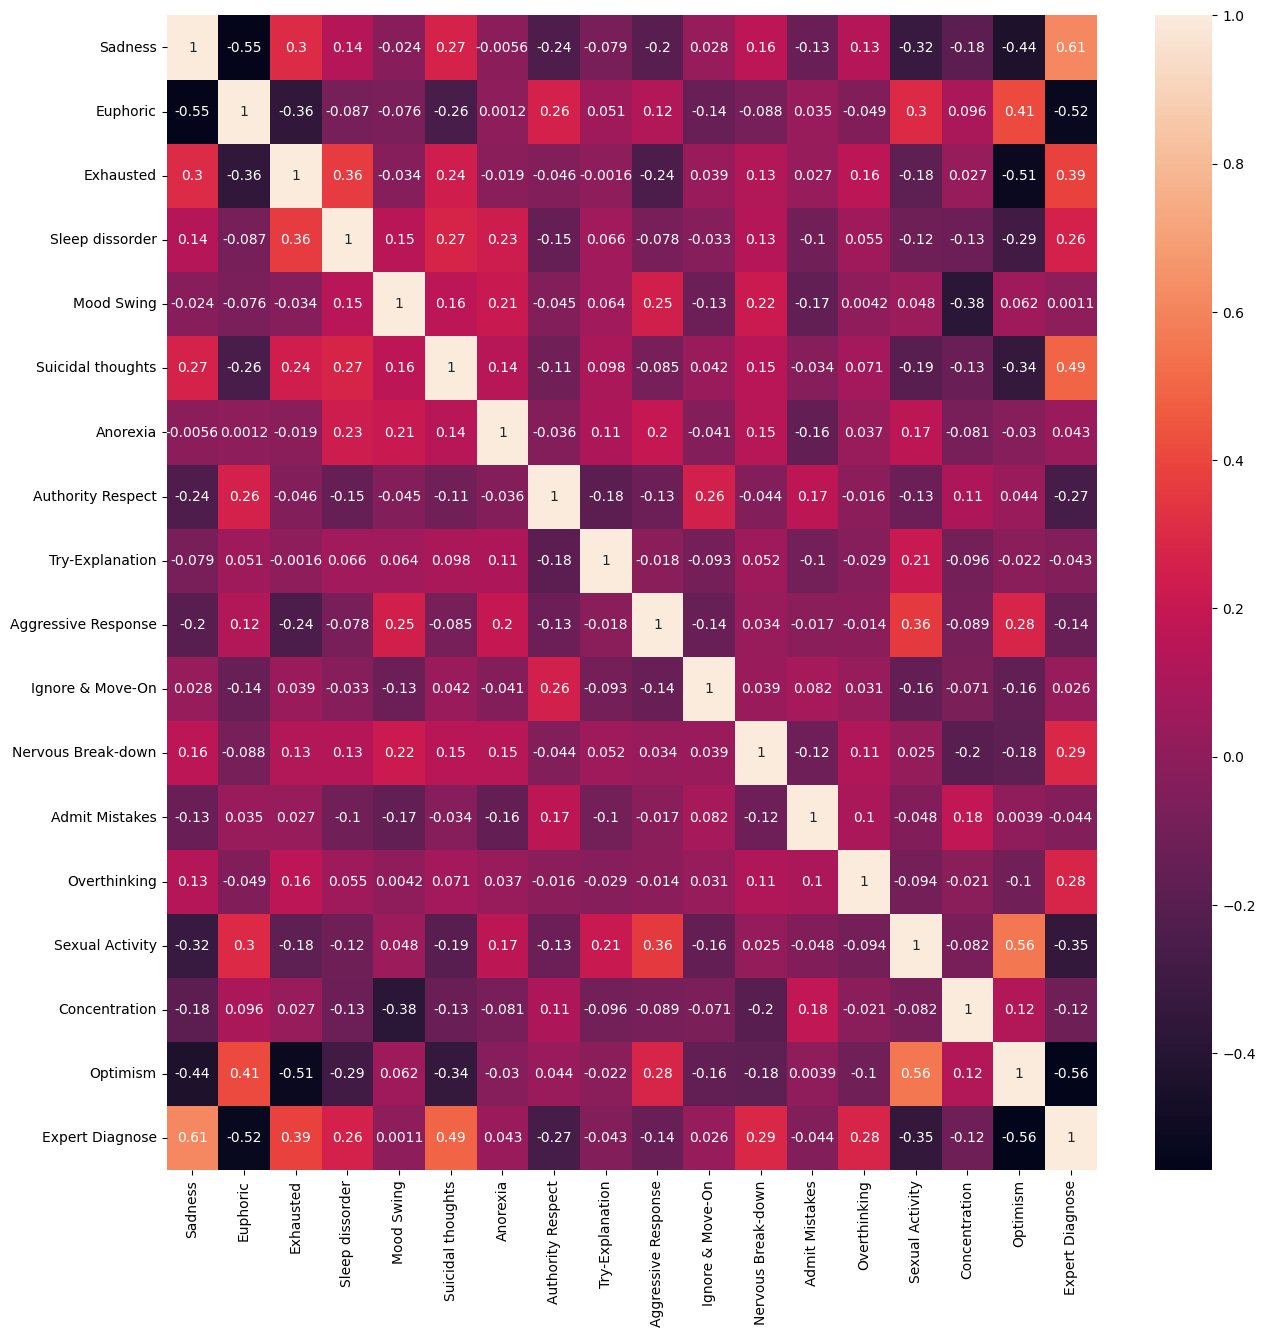

In [36]:
plt.figure(figsize=(15,15))
corr = df.corr()
sns.heatmap(data=corr,annot=True);

In [37]:
#unsurprisingly, sadness and suicidal thoughts correlate with the target column ordered as it is
#aggression has the highest correlation with sexual activity, these may be features of mania in bipolar 1
#sexual activity and aggression also being correlated with optimism support this theory
#sexual activity being negatively correlated with the target column further supports this theory
#curiously, both sexual activity and optimism have no correlation with mood swings - could be the nature of survey data and a wish for patients to avoid diagnosis
#mood swings also has a negative correlation with concentration
#overthinking has a fairly positive correlation with target column - this may be a result of comorbidity of depression with generalized anxiety (not in this dataset)

In [38]:
df_normal = df[df['Expert Diagnose']==0].copy()
df_normal

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5,5,6,0
7,3,2,2,2,0,0,0,0,1,0,0,0,0,1,5,5,5,0
10,1,2,1,1,0,0,0,1,0,0,0,0,1,0,5,7,8,0
13,3,3,2,2,0,0,0,1,0,0,0,0,0,0,5,7,5,0
16,2,3,2,2,0,0,0,0,1,0,0,0,1,0,5,4,6,0
19,2,3,3,2,0,0,0,1,1,1,0,0,1,1,4,4,6,0
22,2,2,2,3,0,0,1,1,1,0,0,0,0,1,3,7,6,0
25,2,2,2,1,0,0,0,1,0,0,1,0,1,0,6,6,5,0
26,2,2,3,2,0,0,0,0,1,1,0,0,0,0,3,4,2,0
29,2,2,2,1,0,1,0,1,0,0,1,0,1,0,5,5,5,0


In [39]:
df_diagnosed = df[df['Expert Diagnose'] != 0]
df_diagnosed

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
0,3,1,2,2,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,2,4,2,2,1,0,0,0,1,1,0,1,1,0,6,5,7,1
3,3,1,3,4,1,1,1,0,1,0,0,0,0,0,3,2,2,2
5,3,2,2,4,0,1,1,1,0,0,0,0,1,0,3,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2,1,2,4,1,1,1,0,0,0,1,0,1,1,1,5,1,2
115,4,1,3,2,0,1,0,0,1,0,1,0,0,1,2,5,3,3
116,2,2,2,1,1,0,0,0,0,1,0,0,0,1,6,7,8,1
117,3,2,3,2,1,0,1,1,0,0,0,1,0,1,1,5,3,2


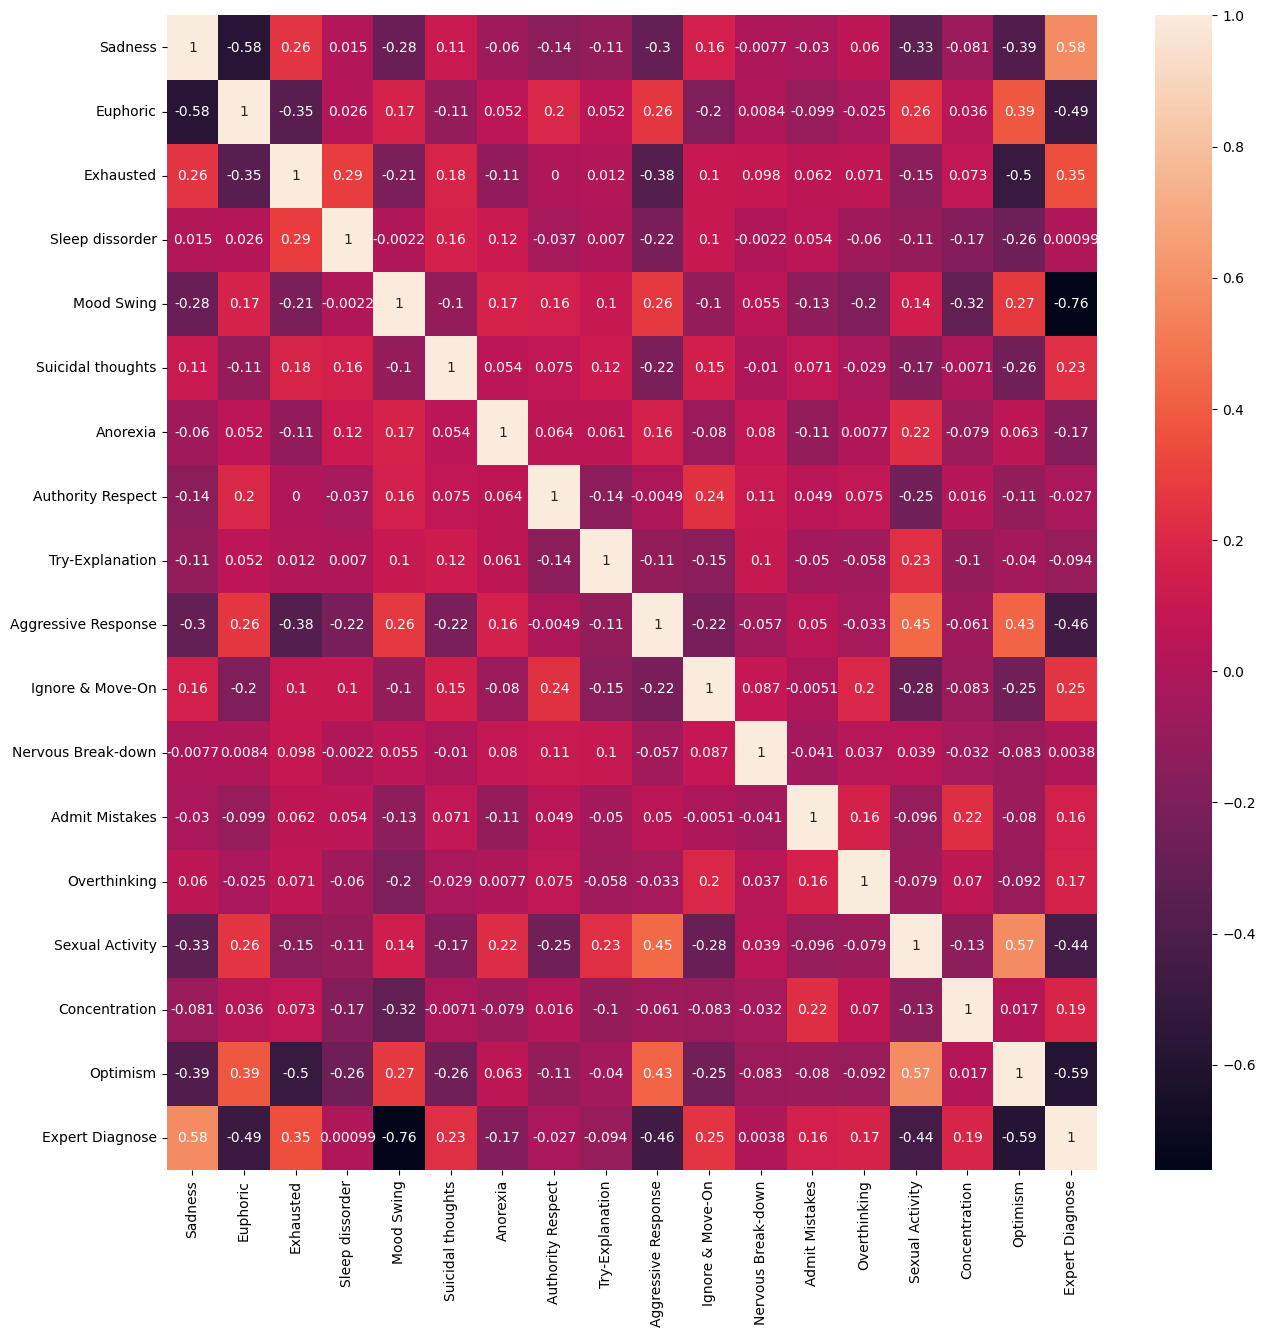

In [40]:
plt.figure(figsize=(15,15))
corr_diagnosed = df_diagnosed.corr()
sns.heatmap(data=corr_diagnosed, annot=True);

In [41]:
#remvoing neurotypical diagnoses from the dataset doesn't appear to have a significant effect on correlation analysis

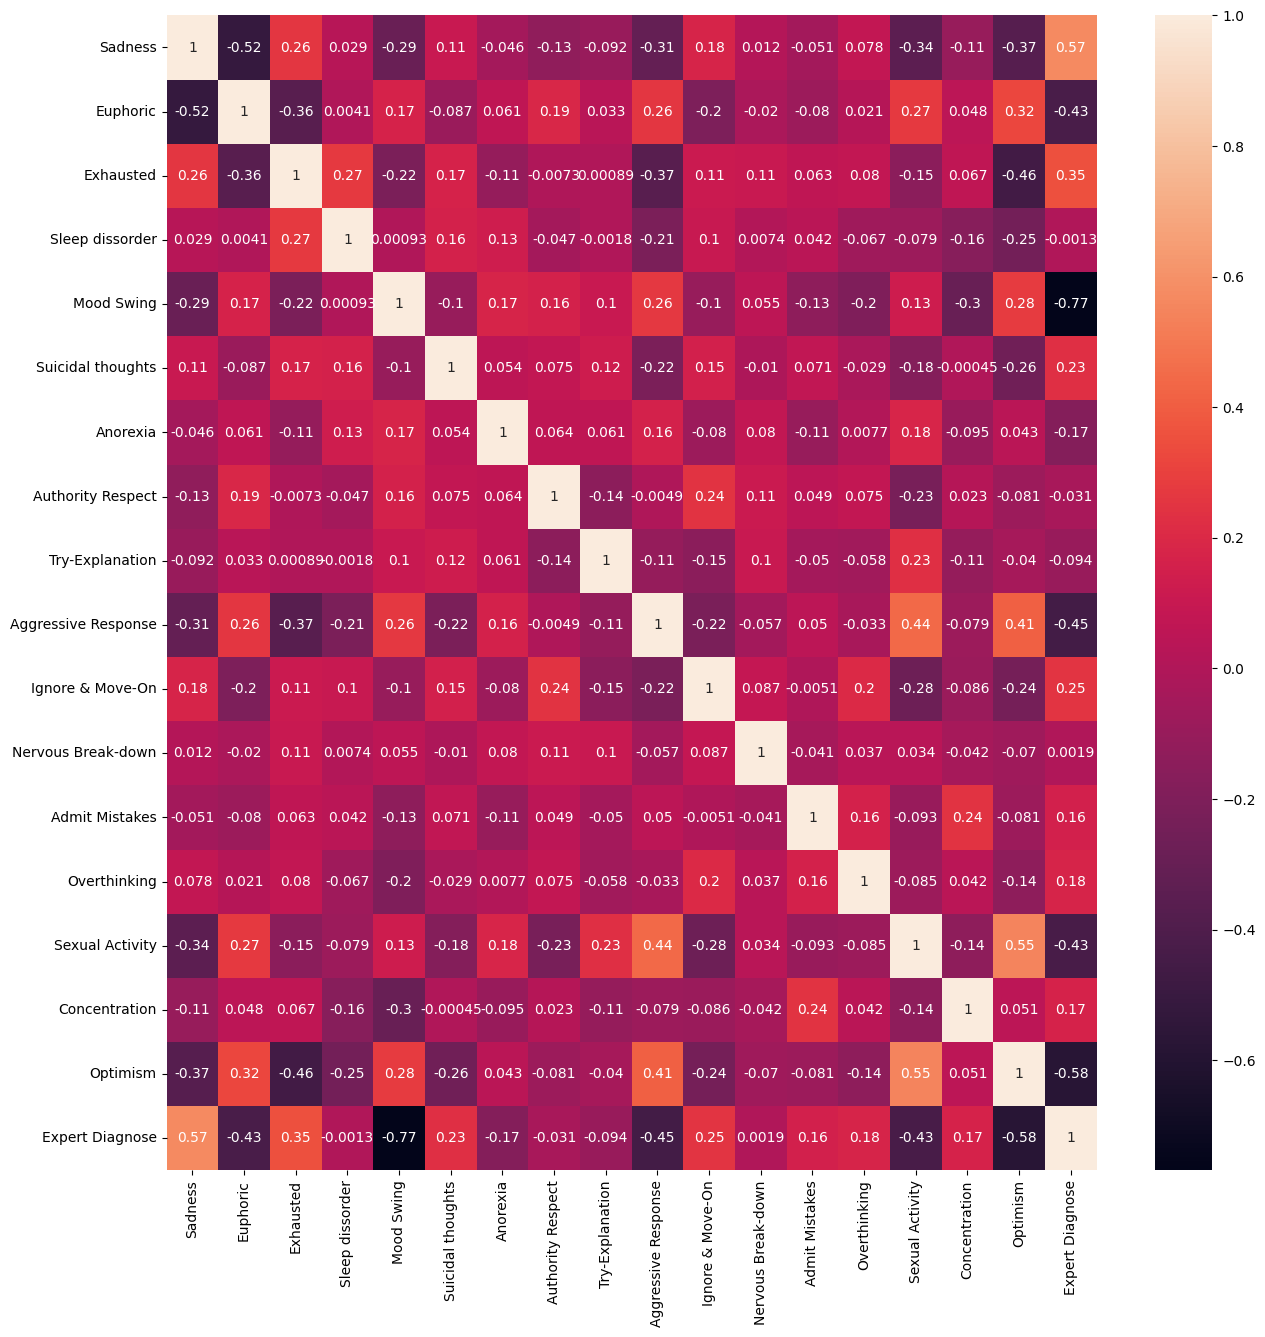

In [42]:
#checking a spearmans correlation as much of this data may not be parametric
plt.figure(figsize=(15,15))
corr_diagnosed_spear = df_diagnosed.corr(method='spearman')
sns.heatmap(data=corr_diagnosed_spear, annot=True);

In [43]:
#no significant differences in correlations with target column after changing correlation types to spearman's